In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
file_path = 'heart_disease_clean_dataset.csv'  # Update with your dataset path
df = pd.read_csv(file_path)

# Step 2: Add artificial data for 'no heart disease' (target=0) 
# age: The age of the patient (in years). sex: The gender of the patient (1 = male, 0 = female).
# cp: Chest pain type (0 to 3, with 3 indicating the most severe pain).trestbps: Resting blood pressure (in mm Hg).
# chol: Serum cholesterol level (in mg/dl). fbs: Fasting blood sugar (> 120 mg/dl) (1 = true, 0 = false).
# restecg: Resting electrocardiographic results (0 = normal, 1 = ST-T wave abnormality, 2 = left ventricular hypertrophy).
# thalach: Maximum heart rate achieved.
# exang: Exercise-induced angina (1 = yes, 0 = no).
# oldpeak: ST depression induced by exercise relative to rest.
# slope : The slope of the peak exercise ST segment (0 = upsloping, 1 = flat, 2 = downsloping).
# ca: Number of major vessels (0–3) colored by fluoroscopy.
# thal: Thalassemia (1 = normal, 2 = fixed defect, 3 = reversible defect).
# target: Presence of heart disease (1 = disease, 0 = no disease).

new_data = {
    'age': [54, 35, 67, 45, 60],
    'sex': [1, 0, 1, 1, 0],
    'cp': [0, 2, 1, 0, 3],
    'trestbps': [132, 120, 148, 115, 140],
    'chol': [218, 210, 236, 170, 220],
    'fbs': [0, 1, 0, 0, 1],
    'restecg': [1, 0, 1, 1, 0],
    'thalach': [160, 158, 130, 178, 138],
    'exang': [0, 1, 0, 0, 1],
    'oldpeak': [0.2, 1.5, 0.6, 0.9, 0.4],
    'slope': [1, 2, 0, 2, 1],
    'ca': [0, 1, 2, 0, 1],
    'thal': [2, 1, 3, 2, 1],
    'target': [0, 0, 0, 0, 0]  # Target: No heart disease
}

# Append the new data (target = 0) to the original dataset
df_new = pd.concat([df, pd.DataFrame(new_data)], ignore_index=True)

# Show the updated dataset distribution
print(df_new['target'].value_counts()) 

target
1    10
0     5
Name: count, dtype: int64


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
file_path = 'heart_disease_clean_dataset.csv'  # Update with your dataset path
df = pd.read_csv(file_path)

# Step 2: Add artificial data for 'no heart disease' (target=0)
new_data = {
    'age': [54, 35, 67, 45, 60],
    'sex': [1, 0, 1, 1, 0],
    'cp': [0, 2, 1, 0, 3],
    'trestbps': [132, 120, 148, 115, 140],
    'chol': [218, 210, 236, 170, 220],
    'fbs': [0, 1, 0, 0, 1],
    'restecg': [1, 0, 1, 1, 0],
    'thalach': [160, 158, 130, 178, 138],
    'exang': [0, 1, 0, 0, 1],
    'oldpeak': [0.2, 1.5, 0.6, 0.9, 0.4],
    'slope': [1, 2, 0, 2, 1],
    'ca': [0, 1, 2, 0, 1],
    'thal': [2, 1, 3, 2, 1],
    'target': [0, 0, 0, 0, 0]  # Target: No heart disease
}

# Append the new data (target = 0) to the original dataset
df_new = pd.concat([df, pd.DataFrame(new_data)], ignore_index=True)

# Show the updated dataset distribution
print(df_new['target'].value_counts())

target
1    10
0     5
Name: count, dtype: int64


In [6]:
# Step 3: Preprocess the data .
# This step is to separate the features and the target variable and standardize the features to improve the performance of the SVM model.
# Define features (X) and target (y)
X = df_new.drop('target', axis=1)  # Features: all columns except 'target'
y = df_new['target']  # Target: the 'target' column

# Standardize the feature values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [10]:
# Step 5: Train the SVM classifier
svm = SVC(kernel='linear')  # Using a linear kernel for SVM
svm.fit(X_train, y_train)

SVC(kernel='linear')

Accuracy: 0.20
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      0.33      0.33         3

    accuracy                           0.20         5
   macro avg       0.17      0.17      0.17         5
weighted avg       0.20      0.20      0.20         5

Confusion Matrix:
[[0 2]
 [2 1]]


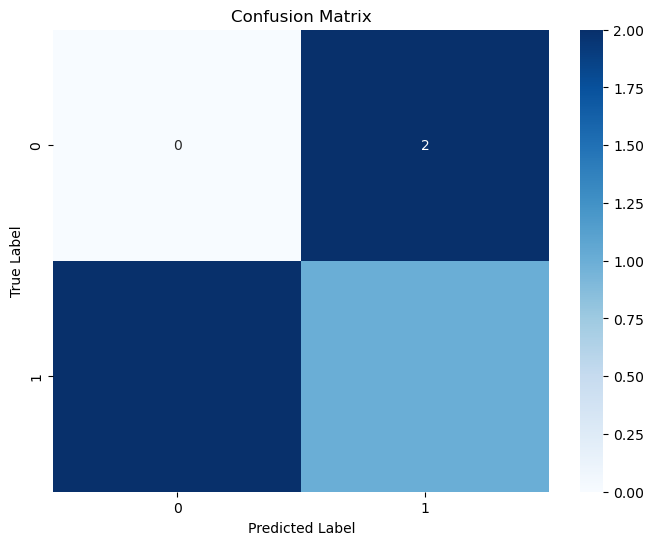

In [12]:
# Step 6: Make predictions on the test set
y_pred = svm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Visualize confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()